<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a series of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [119]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [121]:
#Rows = 979
rows = len(movies)

#Columns = 6 
columns = len(movies.columns)

print('number of rows:', rows)
print('number of columns:', columns)

number of rows: 979
number of columns: 6


#### Check the data type of each column.

In [122]:
movies.dtypes
# or movies.info()

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [123]:
movies['duration'].mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [124]:
movies.sort_values(by=['duration'], ascending=True)
#Shortest is 'Freaks' at 64 minutes
#Longest is 'Hamlet' at 242 minutes 

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
...,...,...,...,...,...,...
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

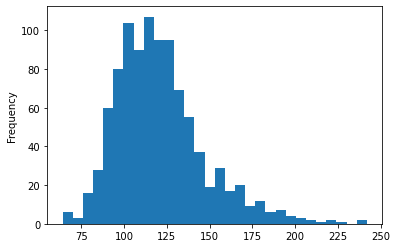

In [125]:
movies.duration.plot(kind='hist', bins=30);
# square root of 979 = 31, therefore set bins to 30 

#### Use a box plot to display that same data.

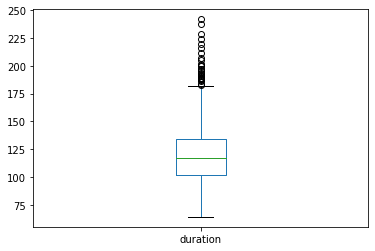

In [126]:
movies.duration.plot(kind='box');

## Intermediate level

#### Count how many movies have each of the content ratings.

In [127]:
movies.content_rating.value_counts()

R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

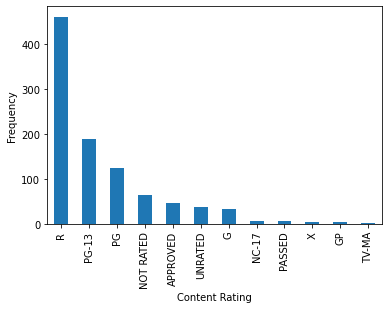

In [128]:
frequnecy = movies.content_rating.value_counts()
frequnecy.plot(kind='bar')
plt.xlabel('Content Rating');
plt.ylabel('Frequency');

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [129]:
movies['content_rating'] = movies['content_rating'].replace(['NOT RATED','APPROVED', 'PASSED', 'GP'], 'UNRATED')
movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17        7
X            4
TV-MA        1
Name: content_rating, dtype: int64

#### Convert the following content ratings to "NC-17": X, TV-MA.

In [130]:
movies['content_rating'] = movies['content_rating'].replace(['X', 'TV-MA'], 'NC-17')
movies.content_rating.value_counts()

R          460
PG-13      189
UNRATED    160
PG         123
G           32
NC-17       12
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [131]:
print(movies.isnull().sum())

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64


#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [135]:
movies['content_rating'].fillna('UNRATED', inplace = True)
print(movies.isnull().sum()) #checking missing are gone 

star_rating       0
title             0
content_rating    0
genre             0
duration          0
actors_list       0
dtype: int64


#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [111]:
average_long_movie = movies[movies['duration'] >= 120].star_rating.mean()
average_short_movie = movies[movies['duration'] < 120].star_rating.mean()
print('average star rating for movies 2 hours or longer:', average_long_movie)
print('average star rating for movies shorter than 2 hours:', average_short_movie)

average star rating for movies 2 hours or longer: 7.948898678414082
average star rating for movies shorter than 2 hours: 7.838666666666657


#### Use a visualization to detect whether there is a relationship between duration and star rating.

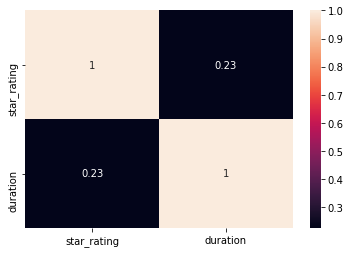

In [157]:
import seaborn as sns

small_df = movies[['star_rating', 'duration']]
correlation_mat = small_df.corr()
sns.heatmap(correlation_mat, annot = True)

plt.show()
# No correlation between duration and star rating 

#### Calculate the average duration for each genre.

In [162]:
movies.head() #checking what variable names were 
movies.groupby('genre')['duration'].mean().reset_index()

,genre,duration
0,Action,126.485294
1,Adventure,134.840000
2,Animation,96.596774
3,Biography,131.844156
4,Comedy,107.602564
5,Crime,122.298387
6,Drama,126.539568
7,Family,107.500000
8,Fantasy,112.000000
9,Film-Noir,97.333333


## Advanced level

#### Visualize the relationship between content rating and duration.

Text(0, 0.5, 'Duration')

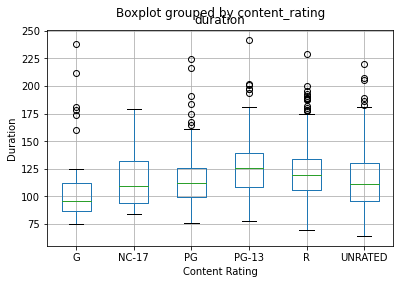

In [321]:
movies.boxplot(column = 'duration', by='content_rating')

plt.xlabel('Content Rating')
plt.ylabel('Duration')

#### Determine the top rated movie (by star rating) for each genre.

In [233]:
top_rated_movie = movies.groupby('genre', sort=True)[['star_rating', 'title']]
print(top_rated_movie.max())

movies[movies['title']=='Zodiac']
#I know this is incorrect.... 

           star_rating                                title
genre                                                      
Action             9.0                              Yojimbo
Adventure          8.9                            True Grit
Animation          8.6                       Wreck-It Ralph
Biography          8.9                        Walk the Line
Comedy             8.6                           Zombieland
Crime              9.3                               Zodiac
Drama              8.9                                 Zulu
Family             7.9  Willy Wonka & the Chocolate Factory
Fantasy            7.7            The City of Lost Children
Film-Noir          8.3                        The Third Man
History            8.0                  Battleship Potemkin
Horror             8.6                                [Rec]
Mystery            8.6                              Vertigo
Sci-Fi             8.2        The Day the Earth Stood Still
Thriller           8.0            The Ma

,star_rating,title,content_rating,genre,duration,actors_list
677,7.7,Zodiac,R,Crime,157,"[u'Jake Gyllenhaal', u'Robert Downey Jr.', u'M..."


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [232]:
duplicates = movies[movies.duplicated(['title'], keep=False)]
duplicates.sort_values(by='title')
#Only real duplicate is 'The Girl with the Dragon Tattoo' 

,star_rating,title,content_rating,genre,duration,actors_list
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [273]:
movies_count = movies.genre.value_counts()
relevant_genres = ['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure', 'Animation', 'Horror', 'Mystery']

genre = movies[movies['genre'].isin(relevant_genres)]
print(genre.groupby('genre')['star_rating'].mean())

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64


#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [284]:
movies_count = movies.genre.value_counts()
relevant_genres = list(movies_count[movies_count>10].index)

genre = movies[movies['genre'].isin(relevant_genres)]
print(genre.groupby('genre')['star_rating'].mean())

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64


#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [294]:
boolean = movies.genre.value_counts() >= 10 
boolean
star_rating = movies.groupby('genre')['star_rating'].mean()
star_rating[boolean]

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [317]:
count_means = movies.groupby('genre').star_rating.agg(['count', 'mean'])
count_means[count_means['count'] >= 10]

,count,mean
genre,,
Action,136,7.884559
Adventure,75,7.933333
Animation,62,7.914516
Biography,77,7.862338
Comedy,156,7.822436
Crime,124,7.916935
Drama,278,7.902518
Horror,29,7.806897
Mystery,16,7.975000


## Bonus

#### Figure out something "interesting" using the actors data!

In [316]:
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [328]:
duplicates = movies[movies.duplicated(['actors_list'], keep=False)]
duplicate_actors = duplicates.sort_values(by='title')
duplicate_actors.sort_values('star_rating', ascending=False)
#Back to the Future is the highest rated movie that has duplicated cast. 

,star_rating,title,content_rating,genre,duration,actors_list
54,8.5,Back to the Future,PG,Adventure,116,"[u'Michael J. Fox', u'Christopher Lloyd', u'Le..."
520,7.8,Back to the Future Part II,PG,Adventure,108,"[u'Michael J. Fox', u'Christopher Lloyd', u'Le..."
642,7.7,Harry Potter and the Deathly Hallows: Part 1,PG-13,Adventure,146,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert..."
222,8.1,Harry Potter and the Deathly Hallows: Part 2,PG-13,Adventure,130,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert..."
727,7.6,Harry Potter and the Goblet of Fire,PG-13,Adventure,157,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert..."
891,7.5,Harry Potter and the Half-Blood Prince,PG,Adventure,153,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert..."
932,7.4,Harry Potter and the Order of the Phoenix,PG-13,Adventure,138,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert..."
551,7.8,Harry Potter and the Prisoner of Azkaban,PG,Adventure,142,"[u'Daniel Radcliffe', u'Emma Watson', u'Rupert..."
19,8.7,Star Wars,PG,Action,121,"[u'Mark Hamill', u'Harrison Ford', u'Carrie Fi..."
12,8.8,Star Wars: Episode V - The Empire Strikes Back,PG,Action,124,"[u'Mark Hamill', u'Harrison Ford', u'Carrie Fi..."
